In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

# Freeze units analysis (Fig 10)

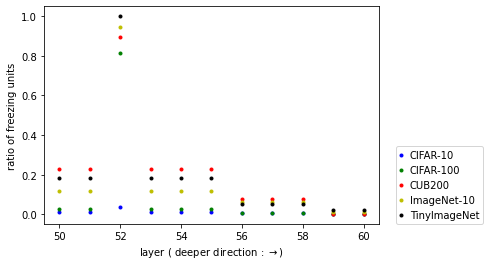

In [11]:
color_l=['b','g','r','y','k']
dataset=['CIFAR-10','CIFAR-100','CUB200','ImageNet-10','TinyImageNet']
for t in range(5):
    normal_file='~/freeze_stat/%s.csv'%(dataset[t])
    normal=pd.read_csv(normal_file)
    normal_pre=[]
    for index, row in normal.iterrows():
        if (row['layer']>=50):
            #print(float(row['freeze'])/float(row['total']))
            normal_pre.append(float(row['freeze'])/float(row['total']))
    layer=range(50,61)
    label_normal=dataset[t]
    plt.scatter(layer,normal_pre,marker='.',color=color_l[t],label=label_normal)

#plt.title("CLIP-Dissect, TinyImagenet with seed 5678")
plt.xlabel(r"layer ( deeper direction : $\rightarrow$)")
plt.ylabel("ratio of freezing units")
x_ticks=range(50,61,2)
plt.xticks(ticks=x_ticks, labels=x_ticks)
leg = plt.legend(bbox_to_anchor=(1.05, 0), loc=(0.5,0), borderaxespad=0.2, handlelength=0.2, handletextpad=0.8, fancybox=True)
plt.show()

# CLIP-Dissect Analysis

## Table 4

In [23]:
cifar10=pd.read_csv('~/resnet18_cifar10_5task_20epoch/resnet18-SRT-cifar10-task1-5_all.csv')
before=cifar10.loc[(cifar10['layer'] =='layer4')&(cifar10['similarity']>=0.3)]
before

,layer,unit,description,similarity
131,layer4,131,textile,0.322510
411,layer4,411,logo,0.305145
431,layer4,431,textile,0.308319


## Table 5,6

In [102]:
tasks=[[] for i in range(5)]
concept_list=[{} for i in range(5)]
for t in range(5):
    with open(f'results/resnet18_cifar100_5task_20epoch/sol1/resnet18-SRT-cifar100-task{t}-5_all.csv', newline='') as f:
        reader = csv.reader(f)
        tasks[t] = list(reader)
    for line in tasks[t][1:]:
        if float(line[3])>=0.3:
            concept_list[t][int(line[1])]=line[2]
    print(concept_list[t])

{4: 'leaf', 103: 'leaf', 165: 'leaf', 179: 'leaf', 192: 'green', 194: 'leaf', 209: 'green', 220: 'leaf', 317: 'leaf', 350: 'leaf', 356: 'stripe', 359: 'leaf', 372: 'stripe', 395: 'leaf', 408: 'leaf', 461: 'leaf', 464: 'dotted', 480: 'green', 490: 'zebra'}
{2: 'textile', 4: 'green', 103: 'green', 140: 'zebra', 148: 'zebra', 216: 'airlines', 291: 'bedrooms', 306: 'green', 331: 'green', 359: 'leaf', 372: 'stripe', 464: 'dotted', 480: 'green', 483: 'aaa', 493: 'stripes'}
{6: 'accommodations', 88: 'accommodations', 103: 'green', 140: 'zebra', 148: 'zebra', 216: 'aviation', 306: 'green', 330: 'accommodations', 356: 'stripe', 359: 'green', 372: 'stripe', 377: 'accommodations', 390: 'green', 413: 'kitchens', 464: 'dotted', 480: 'green'}
{4: 'green', 30: 'kitchens', 64: 'leaf', 103: 'green', 165: 'leaf', 183: 'zebra', 190: 'zebra', 216: 'aviation', 227: 'accommodations', 291: 'bedrooms', 306: 'green', 330: 'accommodations', 339: 'zebra', 359: 'green', 372: 'stripe', 377: 'accommodations', 390: 

In [103]:
for task in range(4):
    total=0
    fix=0
    for key, value in concept_list[task].items():
        if key in concept_list[task+1].keys():
            total=total+1
            if concept_list[task+1][key]==value:
                fix=fix+1
                #print(key,value)

    print(f"task:{task} after task:{task+1}, fix:{fix}, still concept units:{total}, original concept units:{len(concept_list[task].items())}, ratio of fixing: {fix/len(concept_list[task].items())}")

task:0 after task:1, fix:4, still concept units:6, original concept units:19, ratio of fixing: 0.21052631578947367
task:1 after task:2, fix:7, still concept units:9, original concept units:15, ratio of fixing: 0.4666666666666667
task:2 after task:3, fix:11, still concept units:11, original concept units:16, ratio of fixing: 0.6875
task:3 after task:4, fix:20, still concept units:21, original concept units:23, ratio of fixing: 0.8695652173913043


## Figure 1

In [ ]:
# load from last results
ratio=[0.21,0.46,0.68,0.86]

In [ ]:
dataset=['Finetune','EWC','SI','LwF','GEM','MIR','IG-CL-freeze-all','IG-CL-freeze-part']
mark=['.','x','o','v','D','s','x','s']
col=['navy','peru','darkseagreen','lightseagreen','slategrey','thistle']
for t in range(8):
    layer=range(2,6)
    label_normal=dataset[t]
    if(t<6):
        plt.plot(layer,ratio[t],marker=mark[t],color=col[t],linestyle='dashed',label=label_normal)
    else:
        label_normal+=' (Ours)'
        plt.plot(layer,ratio[t],marker=mark[t],color='r',label=label_normal)

#plt.title("CLIP-Dissect, TinyImagenet with seed 5678")
plt.xlabel("task index")
plt.ylabel("preserved concept unit ratio")
x_ticks=range(2,6)
#plt.xticks(ticks=x_ticks, labels=x_ticks)
SIZE=16
plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.title('(a) CIFAR-100', y=-0.35)
#plt.legend(bbox_to_anchor=(0.5, 1.45),loc="upper center",ncol=3, borderaxespad=0.2, handletextpad=0.8, fancybox=False)
plt.show()